# HW2 - Part 1

The class `gaussian_process_simulator` genereates GP sample paths on $t \in \{0.1,0.2,...,100.0\}$.

In [26]:
import numpy as np
from scipy.stats import multivariate_normal as sp_mvn
import matplotlib.pyplot as plt

class gaussian_process_simulator:
    def __init__(self, tau_cov_scale, phi_cov_range, alpha_cov_power):
        self.hyper_tau = tau_cov_scale
        self.hyper_phi = phi_cov_range
        self.hyper_alpha = alpha_cov_power
        self.grid = np.array([x/10 for x in range(1, 1000)])

    def mean_function1(self, t):
        return 0
    def mean_function2(self, t):
        return np.cos(t/10)*2
    def cov_function_power_exp(self, t1, t2):
        return self.hyper_tau**2 * np.exp(-self.hyper_phi * np.abs(t1-t2)**self.hyper_alpha)

    def run(self, n_num_path, mean_func = 1):
        if mean_func == 1:
            mean_function = self.mean_function1
        elif mean_func == 2:
            mean_function = self.mean_function2
        else:
            raise ValueError("select a correct mean function.")
        mean_vec = np.array([mean_function(t) for t in self.grid])
        cov_mat = np.array([[self.cov_function_power_exp(t1, t2) for t1 in self.grid] for t2 in self.grid])
        path = sp_mvn.rvs(mean = mean_vec, cov=cov_mat, size=n_num_path)
        return path

## 1. constant mean function
Let me consider a constant mean function $\mu(t)=0$ for all $t$.

Fixing $\alpha=2$ (exponential covariance function,) consider three cases
- (blue) $\tau=1, \phi=1$ as a reference,
- (orange) $\tau=10, \phi=1$ to see the effect of $\tau$, and
- (red) $\tau=1, \phi=0.1$ to see the effect of $\phi$.

The next two plots shows five sample paths for each case.

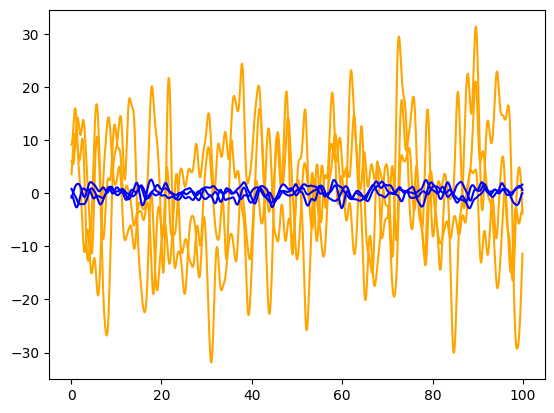

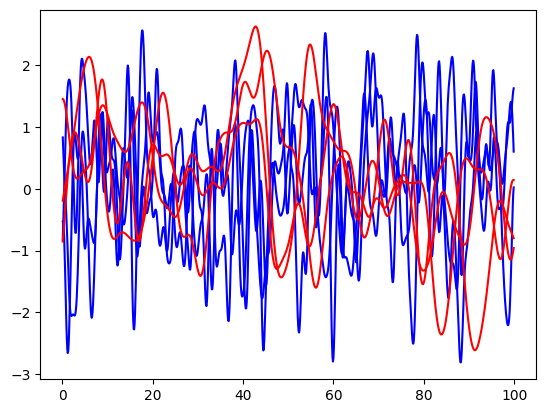

In [27]:
np.random.seed(20250209)
select_mean_function = 1

# alpha = 2 : exponential
inst_1_1_2 = gaussian_process_simulator(1, 1, 2)
x_1_1_2 = inst_1_1_2.run(3, select_mean_function)

inst_10_1_2 = gaussian_process_simulator(10, 1, 2)
x_10_1_2 = inst_10_1_2.run(3, select_mean_function)

inst_1_01_2 = gaussian_process_simulator(1, 0.1, 2)
x_1_01_2 = inst_1_01_2.run(3, select_mean_function)

plt.plot(inst_1_1_2.grid, x_10_1_2.T, color="orange")
plt.plot(inst_1_1_2.grid, x_1_1_2.T, color="blue")
plt.show()

plt.plot(inst_1_1_2.grid, x_1_1_2.T, color="blue")
plt.plot(inst_1_1_2.grid, x_1_01_2.T, color="red")
plt.show()


Note that sample paths are very smooth. This is the effect of $\alpha=2$. Theoretically, it is even differentiable.
Center is zero, by the effect of the mean function.

Compared to five blue realizations with $\tau=1$, the five orange realized curves with $\tau = 10$ shows more amplified curve.
Because $\tau^2$ is a scaler of full covariance matrix of MVN when time points are selected, we can think of $\tau^2$ as an amplifier of the process.

If we compare the blue curves with $\phi=1$ and the red curves with $\phi=0.1$, red curves show a more long-lasted dependency locally.
This is the reason that $1/\phi$ is so-called the parameter for the range of dependence.


Let me move to $\alpha=1$ (Gaussian covariance function) cases. Again, I consider three cases
- (blue) $\tau=1, \phi=1$ as a reference,
- (orange) $\tau=10, \phi=1$ to see the effect of $\tau$, and
- (red) $\tau=1, \phi=0.1$ to see the effect of $\phi$.

The next two plots shows five sample paths for each case.

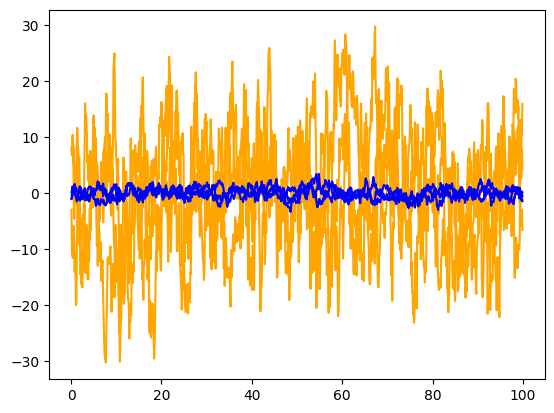

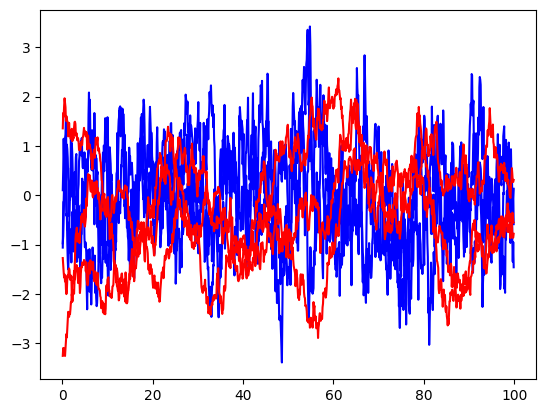

In [28]:

# alpha = 1 : gaussian
inst_1_1_1 = gaussian_process_simulator(1, 1, 1)
x_1_1_1 = inst_1_1_1.run(3, select_mean_function)

inst_10_1_1 = gaussian_process_simulator(10, 1, 1)
x_10_1_1 = inst_10_1_1.run(3, select_mean_function)

inst_1_10_1 = gaussian_process_simulator(1, 0.1, 1)
x_1_10_1 = inst_1_10_1.run(3, select_mean_function)

plt.plot(inst_1_1_1.grid, x_10_1_1.T, color="orange")
plt.plot(inst_1_1_1.grid, x_1_1_1.T, color="blue")
plt.show()

plt.plot(inst_1_1_1.grid, x_1_1_1.T, color="blue")
plt.plot(inst_1_1_1.grid, x_1_10_1.T, color="red")
plt.show()


Obviously, all curves under $\alpha=1$ are less smooth compared to $\alpha=2$ cases in the above.
We can say that $\alpha$ controls the smoothness.

Interestingly, the roles of $\tau$ and $\phi$ are essentially the same even if $\alpha$ values vary.
The higher $\tau$ yields more amplified paths, and the smaller $\phi$ makes path more dependent and correlated locally.
We can repeat almost all comments (except about the smoothness) that we made in $\alpha=2$ cases.


For curiosity, I repeat the three settings for $\alpha=1.5$ and $\alpha=0.5$.
The next two plots comes from $\alpha=1.5$, and the following two are from $\alpha=0.5$.
Theire smoothness varies, but again interpretation for $\tau$ and $\phi$ is left as the same.

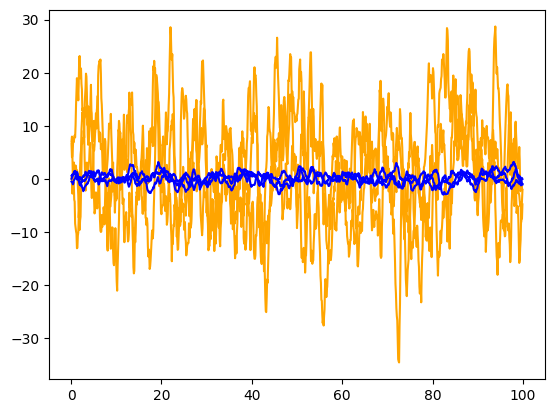

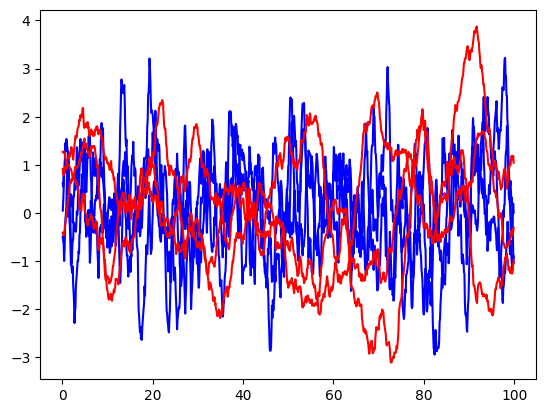

In [29]:

# alpha = 1.5
inst_1_1_15 = gaussian_process_simulator(1, 1, 1.5)
x_1_1_15 = inst_1_1_15.run(3, select_mean_function)

inst_10_1_15 = gaussian_process_simulator(10, 1, 1.5)
x_10_1_15 = inst_10_1_15.run(3, select_mean_function)

inst_1_10_15 = gaussian_process_simulator(1, 0.1, 1.5)
x_1_10_15 = inst_1_10_15.run(3, select_mean_function)

plt.plot(inst_1_1_15.grid, x_10_1_15.T, color="orange")
plt.plot(inst_1_1_15.grid, x_1_1_15.T, color="blue")
plt.show()

plt.plot(inst_1_1_15.grid, x_1_1_15.T, color="blue")
plt.plot(inst_1_1_15.grid, x_1_10_15.T, color="red")
plt.show()


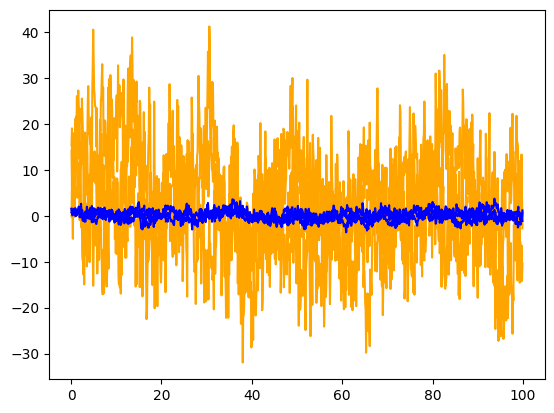

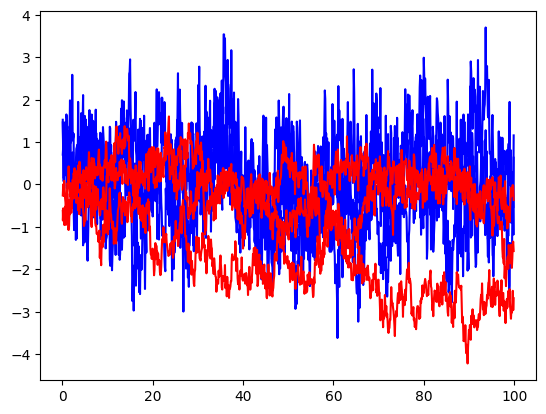

In [30]:

# alpha = 0.5
inst_1_1_05 = gaussian_process_simulator(1, 1, 0.5)
x_1_1_05 = inst_1_1_05.run(3, select_mean_function)

inst_10_1_05 = gaussian_process_simulator(10, 1, 0.5)
x_10_1_05 = inst_10_1_05.run(3, select_mean_function)

inst_1_10_05 = gaussian_process_simulator(1, 0.1, 0.5)
x_1_10_05 = inst_1_10_05.run(3, select_mean_function)

plt.plot(inst_1_1_05.grid, x_10_1_05.T, color="orange")
plt.plot(inst_1_1_05.grid, x_1_1_05.T, color="blue")
plt.show()

plt.plot(inst_1_1_05.grid, x_1_1_05.T, color="blue")
plt.plot(inst_1_1_05.grid, x_1_10_05.T, color="red")
plt.show()


## 2. Non-constant mean function

Let me consider the mean function,
$\mu(t) = 2 cos(t/10)$.

Under $\alpha=2$, I generate five GP curves for the each setting of
- (blue) $\tau=1, \phi=1$ as a reference,
- (orange) $\tau=10, \phi=1$ to see the effect of $\tau$, and
- (red) $\tau=1, \phi=0.1$ to see the effect of $\phi$.


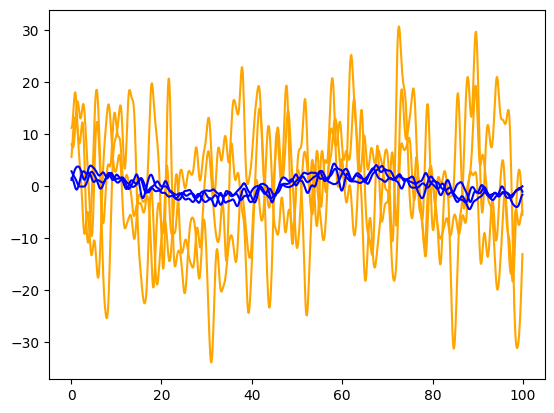

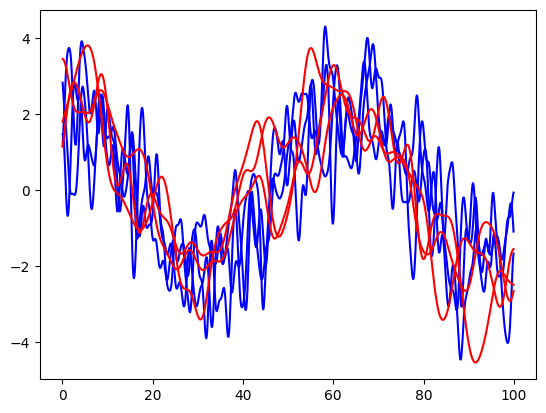

In [31]:

np.random.seed(20250209)
select_mean_function = 2

# alpha = 2 : exponential
inst_1_1_2 = gaussian_process_simulator(1, 1, 2)
x_1_1_2 = inst_1_1_2.run(3, select_mean_function)

inst_10_1_2 = gaussian_process_simulator(10, 1, 2)
x_10_1_2 = inst_10_1_2.run(3, select_mean_function)

inst_1_01_2 = gaussian_process_simulator(1, 0.1, 2)
x_1_01_2 = inst_1_01_2.run(3, select_mean_function)

plt.plot(inst_1_1_2.grid, x_10_1_2.T, color="orange")
plt.plot(inst_1_1_2.grid, x_1_1_2.T, color="blue")
plt.show()

plt.plot(inst_1_1_2.grid, x_1_1_2.T, color="blue")
plt.plot(inst_1_1_2.grid, x_1_01_2.T, color="red")
plt.show()


We can see the cosine pattern. 
For the orange curves, becuase of large $\tau$, the variance dominates the mean functional patern, but still we can observe some cosine trend.

The other features are the same with constant-mean function case.
$\alpha=2$ makes the realized pathes very smooth.
$\tau$ controls the amplitude, and smaller $\phi$ yields stronger correlaton locally.


Next two plots are the result under $\alpha=1$.

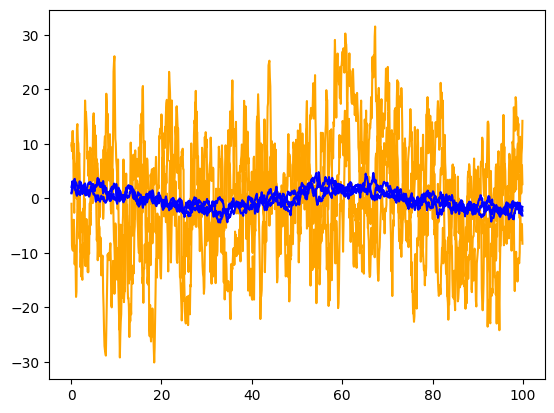

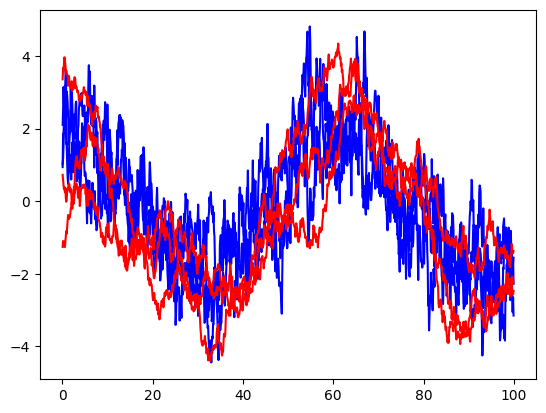

In [33]:

# alpha = 1 : gaussian
inst_1_1_1 = gaussian_process_simulator(1, 1, 1)
x_1_1_1 = inst_1_1_1.run(3, select_mean_function)

inst_10_1_1 = gaussian_process_simulator(10, 1, 1)
x_10_1_1 = inst_10_1_1.run(3, select_mean_function)

inst_1_10_1 = gaussian_process_simulator(1, 0.1, 1)
x_1_10_1 = inst_1_10_1.run(3, select_mean_function)

plt.plot(inst_1_1_1.grid, x_10_1_1.T, color="orange")
plt.plot(inst_1_1_1.grid, x_1_1_1.T, color="blue")
plt.show()

plt.plot(inst_1_1_1.grid, x_1_1_1.T, color="blue")
plt.plot(inst_1_1_1.grid, x_1_10_1.T, color="red")
plt.show()


Under $\alpha=1$, paths are less smooth but still shows the mean function's behavior anyway.
The roles of $\tau$ and $\phi$ continue here.